In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df["Purchased"].value_counts()  # data is not imbalanced so no need of balancing techniques

0    257
1    143
Name: Purchased, dtype: int64

In [5]:
# user id column contains all unique column(causes overfitting) so we can delete it 
del df["User ID"]

In [6]:
#Encoding the gender column
df["Gender"]=df["Gender"].map({"Male":0,"Female":1})

**Splitting the dataset into the Training set and Test set**

In [7]:
X = df.iloc[:,:-1]       
y = df["Purchased"].values  
X.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Feature Scaling**

In [9]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialisation 
X_train = scaler.fit_transform(X_train) # find the values of mu and sigma
X_test = scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [10]:
from sklearn.neighbors import KNeighborsClassifier

**Predicting the Test set results**

In [11]:
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:  #for each k value finding the auroc 
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  :  1  score :  0.859375
K value  :  2  score :  0.8625
K value  :  3  score :  0.896875
K value  :  4  score :  0.890625
K value  :  5  score :  0.90625
K value  :  6  score :  0.909375
K value  :  7  score :  0.903125
K value  :  8  score :  0.9125
K value  :  9  score :  0.90625
K value  :  10  score :  0.903125
K value  :  20  score :  0.875
K value  :  50  score :  0.79375


In [12]:
# at k=9 we get highest cross val score but higher the k value less the boundary accuracy so lets choose K=5
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)  #initialized 
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
y_pred=classifier.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        53
           1       0.86      0.89      0.87        27

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80



**Making the Confusion Matrix**

In [18]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.8727272727272727

In [16]:
from sklearn.metrics import  confusion_matrix
confusion_matrix(y_test,y_pred)

array([[49,  4],
       [ 3, 24]])

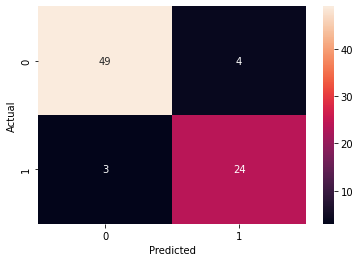

In [17]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)